# 🤖 Using ChatGPT on Shap for Explinability

chat GPT in shap

## 🛠️ Setup Environment
First, we'll set up our environment and import necessary libraries for SHAP analysis and visualization.


In [1]:
import pickle
import shap
import pandas as pd
import numpy as np
import sys

sys.path.append('../../')


## 📥 Load Data and Model

In [2]:
print("Loading model and data...")
# Load trained model (adapt path as needed)
lgbm_model = pickle.load(open('../models/optuna_model.pkl', 'rb'))

# Load data
train = pd.read_parquet('../data/train_data.parquet')
train_y = train['is_fraud']
train_X = train.drop(columns=['is_fraud'])
train_X = train_X[lgbm_model.feature_name_]

# OOT data for individual explanations
oot = pd.read_parquet('../data/oot_data.parquet')
oot_X = oot.drop(columns=['is_fraud'])
oot_X = oot_X[lgbm_model.feature_name_]
print("Model and data loaded.")


Loading model and data...
Model and data loaded.


## 📈 Calculate SHAP values

In [3]:
# print the JS visualization code to the notebook
print("\nCalculating SHAP values and generating global explanations...")
shap.initjs()
explainer = shap.TreeExplainer(lgbm_model,feature_perturbation="tree_path_dependent")
shap_values = explainer(train_X)


Calculating SHAP values and generating global explanations...


 # 🔍  Visualize Results and understand the Model

Displaying SHAP summary plot (bar)...


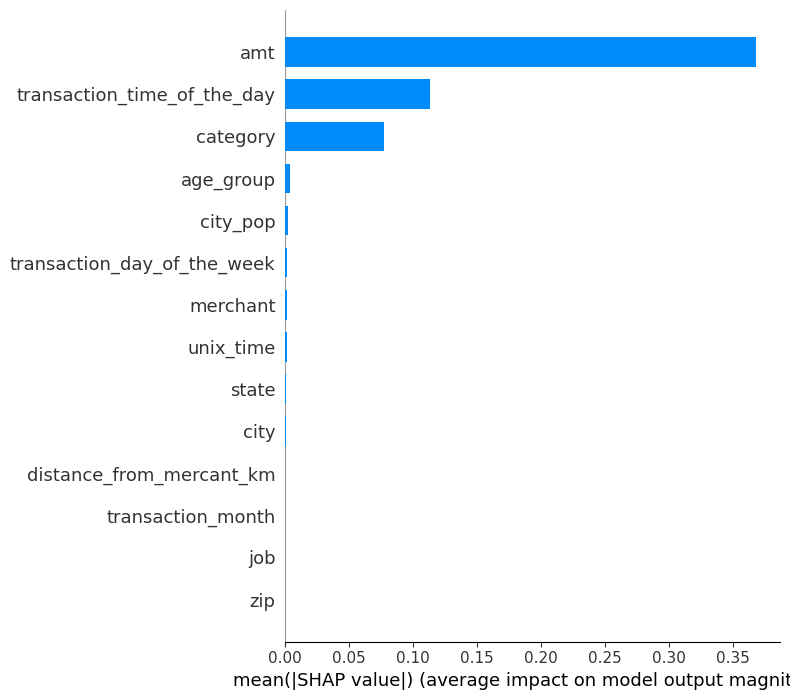

Displaying SHAP summary plot (beeswarm)...


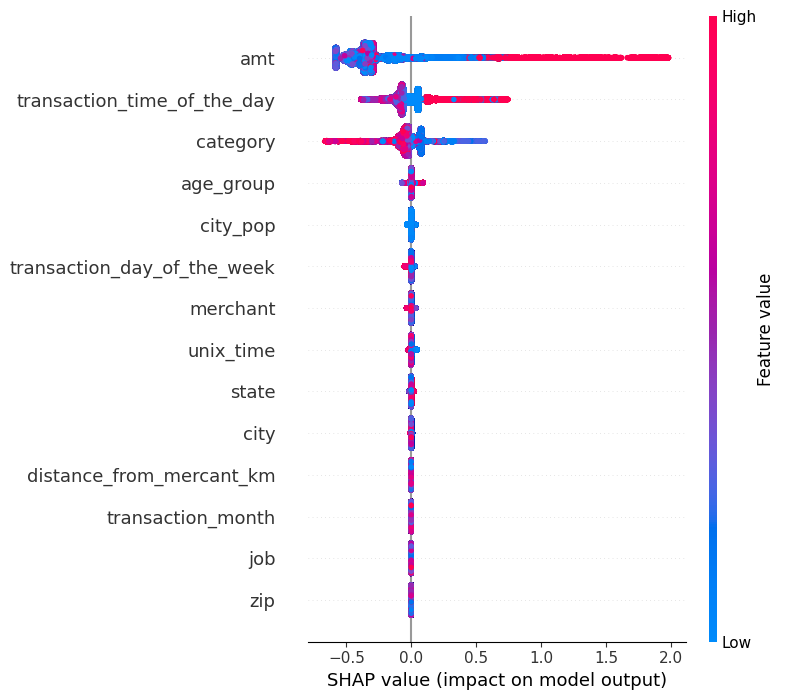

Global explanation plots generated.


In [4]:
# Summary plot (bar)
print("Displaying SHAP summary plot (bar)...")
shap.summary_plot(shap_values, train_X, plot_type="bar", show=True)

# Summary plot (beeswarm)
print("Displaying SHAP summary plot (beeswarm)...")
shap.summary_plot(shap_values, train_X, show=True)
print("Global explanation plots generated.")

## Feature Dependency plots top 5


Generating SHAP dependence plots for top 3 features...
Displaying dependence plot for 'merchant'...


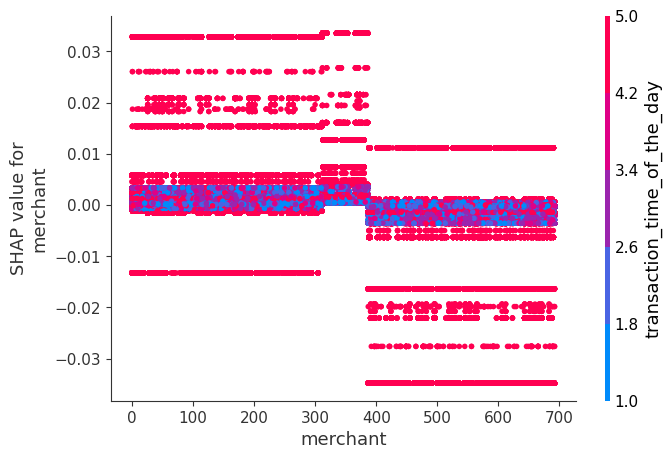

Displaying dependence plot for 'category'...


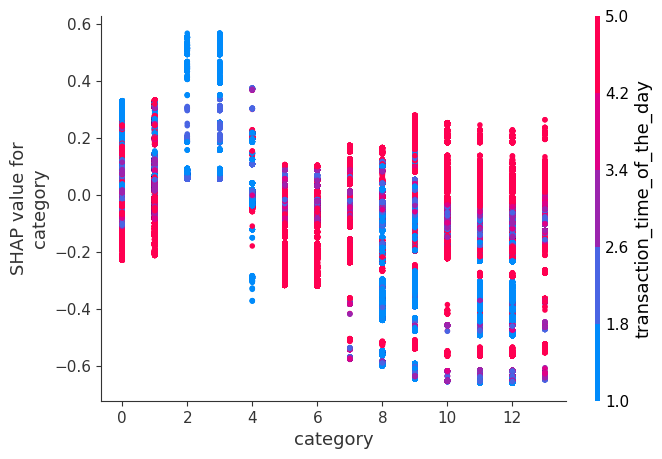

Displaying dependence plot for 'amt'...


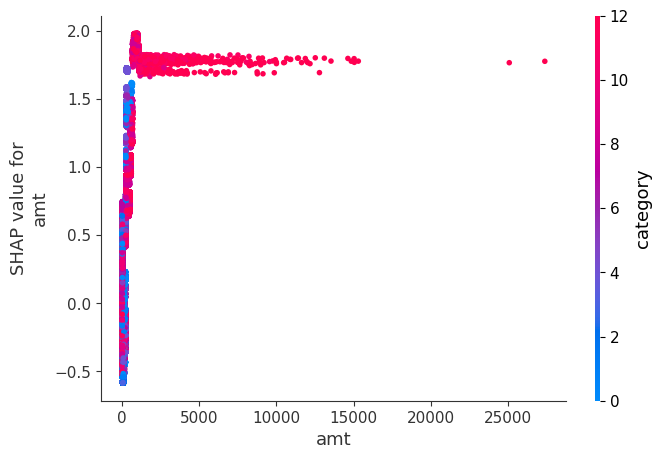

Dependence plots generated.


In [5]:
print("\nGenerating SHAP dependence plots for top 3 features...")
# Dependence plots for top features
for name in lgbm_model.feature_name_[:3]:
    print(f"Displaying dependence plot for '{name}'...")
    shap.dependence_plot(name, shap_values.values, train_X, show=True)
print("Dependence plots generated.")

## Individual Prediction Example


Generating explanation for a single random transaction...
Saving force plot to 'force_plot.html'...
Displaying waterfall plot...


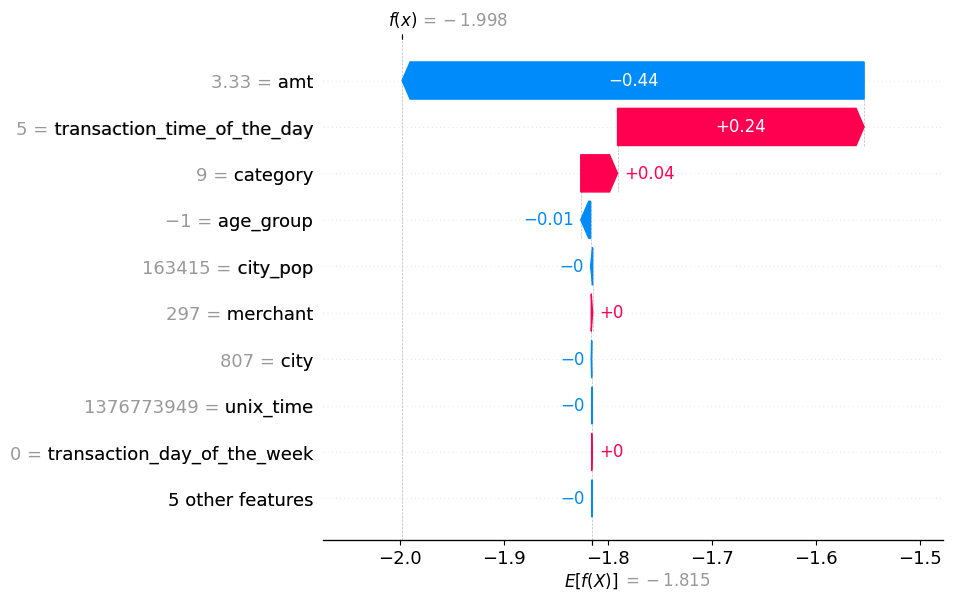

Individual explanation plots generated.


In [6]:
print("\nGenerating explanation for a single random transaction...")
# Pick a random transaction from OOT
transaction_index = np.random.randint(0, len(oot_X))
shap_values_oot = explainer(oot_X)

# Force plot - this is tricky in a script, will save to HTML
print("Saving force plot to 'force_plot.html'...")
force_plot = shap.force_plot(explainer.expected_value, shap_values_oot.values[transaction_index, :], oot_X.iloc[transaction_index], show=False)
shap.save_html('force_plot.html', force_plot)


# Waterfall plot
print("Displaying waterfall plot...")
shap.plots.waterfall(shap_values_oot[transaction_index, :], show=True)
print("Individual explanation plots generated.") 
